Los resultados son diferentes.


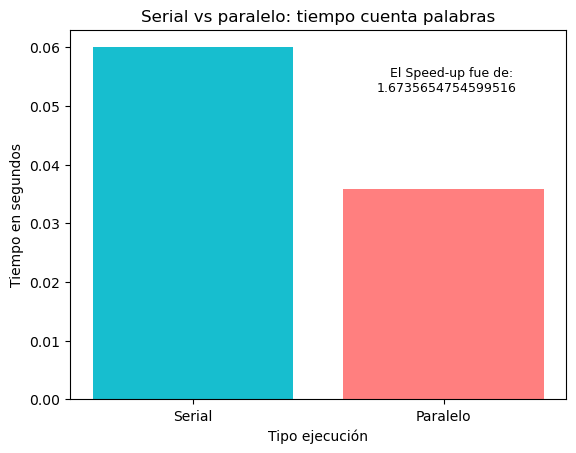

In [5]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

def procesar_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        primera_linea = archivo.readline()
        numero = float(primera_linea.strip())
    return numero

if __name__ == "__main__":
    directorio_actual = os.getcwd()
    os.chdir(f'{directorio_actual}')
    
    # Carga los resultados CSV en DataFrames de pandas
    df1 = pd.read_csv("tiempo_paralelo.csv")
    df2 = pd.read_csv("tiempo_serial.csv")
    iguales = df1.equals(df2)
    if iguales:
        print("Los resultados son iguales.")
    else:
        print("Los resultados son diferentes.")
    
    # Graficamos
    nombre_archivo_serial = 'tiempo_serial.csv'
    nombre_archivo_paralelo = 'tiempo_paralelo.csv'
    resultado_serial = procesar_archivo(nombre_archivo_serial)
    resultado_paralelo = procesar_archivo(nombre_archivo_paralelo)
    valores = [resultado_serial, resultado_paralelo]
    nombres = ['Serial', 'Paralelo']
    fig, ax = plt.subplots()
    ax.bar(nombres, valores, color=['#17becf', '#ff7f7f'])
    ax.text(0.9, 0.9, "El Speed-up fue de: \n"+str(resultado_serial/resultado_paralelo),
             fontsize=9,transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    ax.set_title('Serial vs paralelo: tiempo cuenta palabras')
    ax.set_xlabel('Tipo ejecución')
    ax.set_ylabel('Tiempo en segundos')
    # mostrar el gráfico
    plt.show()